In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.cluster import KMeans
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster import hierarchy

############################################ FEATURE SELECTION ############################################
#!pip install scipy
import scipy.stats as stats
from scipy.stats import chi2_contingency # filter method
from sklearn.feature_selection import RFE # wrapper method
from sklearn.linear_model import LogisticRegression #(This is one possible model to apply inside RFE)
from sklearn.linear_model import LassoCV # embedded method
from sklearn.tree import DecisionTreeClassifier # embedded method

################################################# MODELS ##################################################
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

################################################# METRICS #################################################
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve

################################### MODEL SELECTION & OPTIMIZATION ########################################
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

######################################### DECISION TREES PLOTS ############################################
# in anaconda prompt: conda install python-graphviz
#!pip install pydotplus
from sklearn.tree import export_graphviz
import graphviz
import pydotplus


import warnings
warnings.filterwarnings('ignore')

In [2]:
hr = pd.read_csv('HR_Attrition_Dataset.csv')

In [3]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
hr.set_index('EmployeeNumber', inplace = True)

In [5]:
hr[hr.duplicated()]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,


In [6]:
hr.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.0,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.0,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.0,1.0,1.00,1.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.0,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.0,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.0,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.0,2.0,3.00,5.0
JobSatisfaction,1470.0,2.728571,1.102846,1.0,2.0,3.0,4.00,4.0


In [8]:
hr.describe(include='object').T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
Over18,1470,1,Y,1470
OverTime,1470,2,No,1054


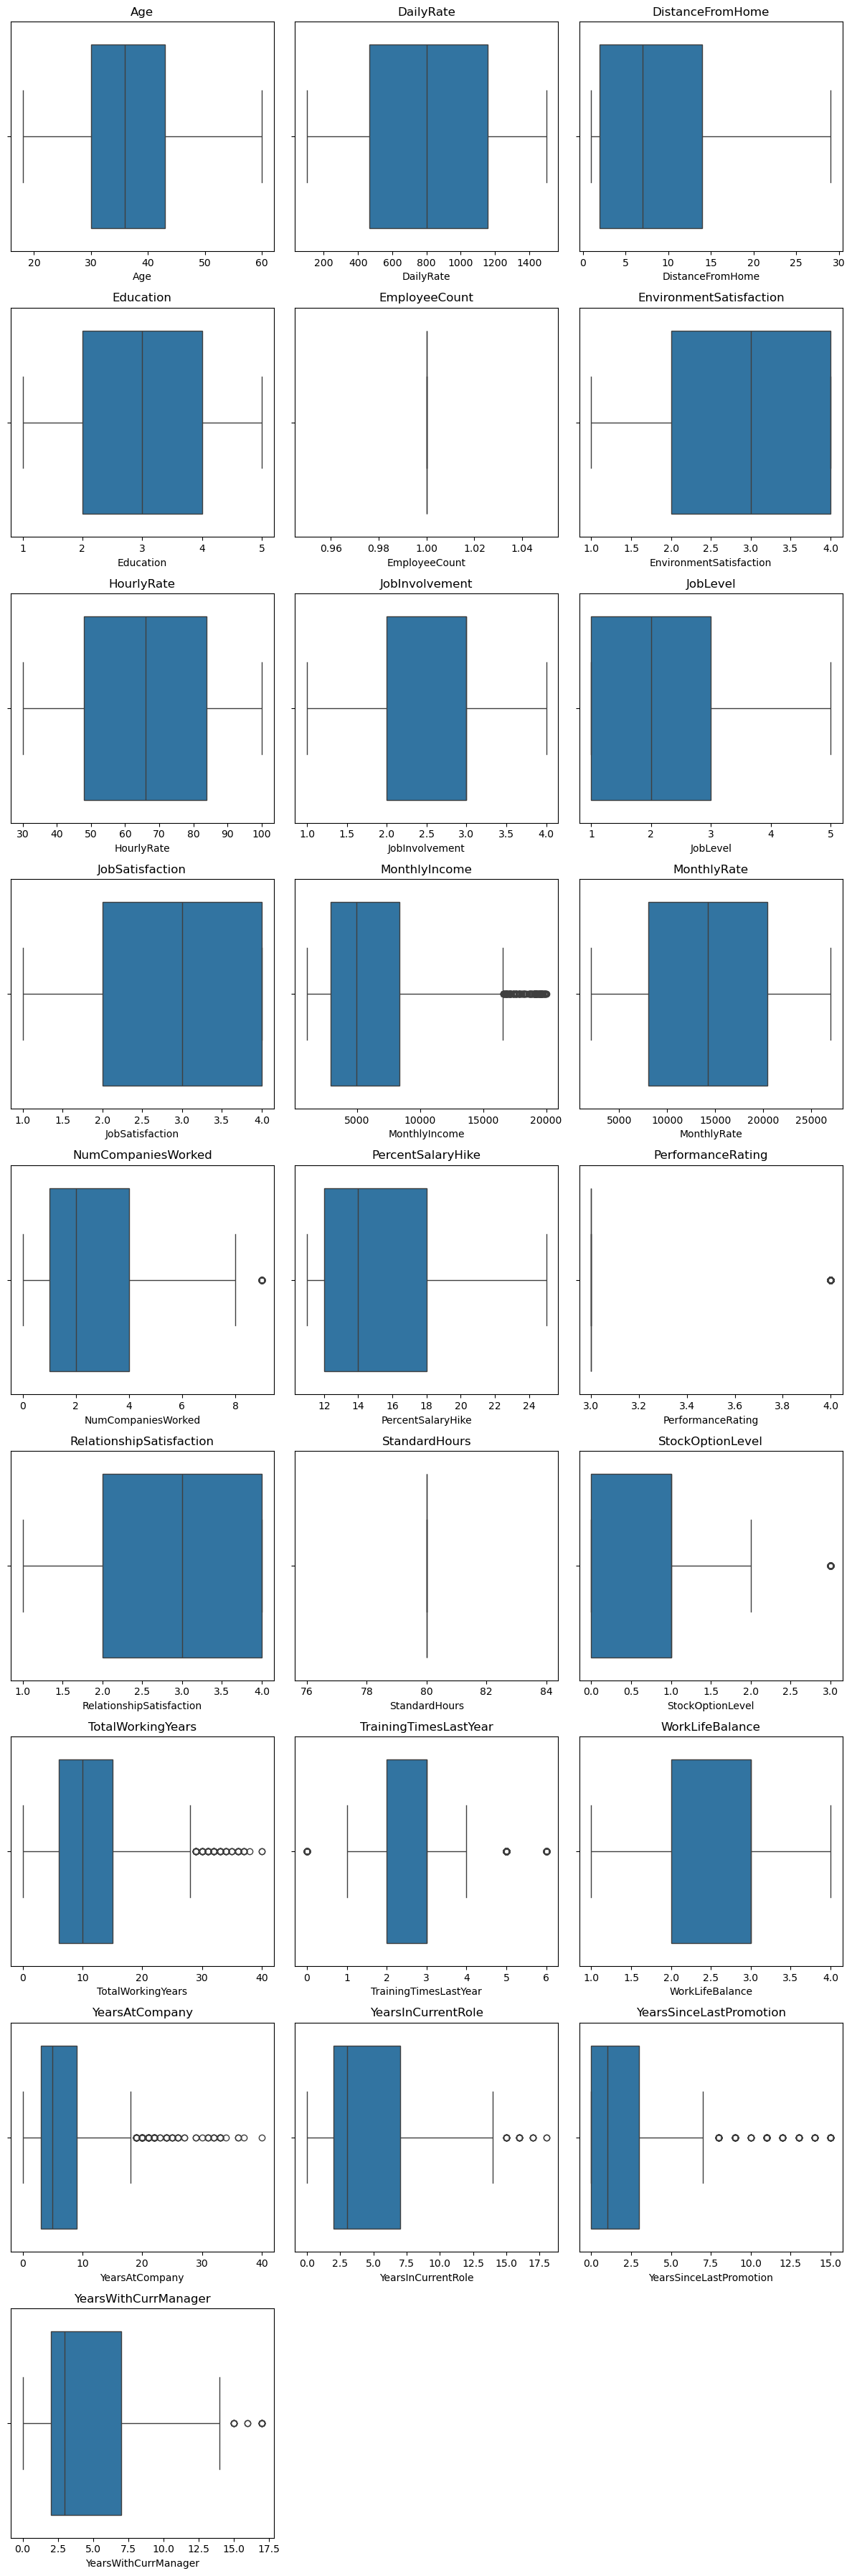

In [22]:
# Define layout
import math
n_cols = 3
n_rows = math.ceil(len(numerical_cols) / n_cols)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))

# Flatten axes for easy indexing
axes = axes.flatten()

# Plot each boxplot
for i, col in enumerate(numerical_cols):
    sns.boxplot(data=hr, x=col, ax=axes[i])
    axes[i].set_title(col)

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [9]:
#Prints a table for each categorical variable with the count of unique values for each
for col in hr.select_dtypes(include=['object', 'category']).columns:
    #print()
    #print(f"--- {col} ---")
    display(hr[col].value_counts())

Attrition
No     1233
Yes     237
Name: count, dtype: int64

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

Gender
Male      882
Female    588
Name: count, dtype: int64

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64

MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64

Over18
Y    1470
Name: count, dtype: int64

OverTime
No     1054
Yes     416
Name: count, dtype: int64

In [25]:
hr_int = hr.select_dtypes(include='int') #used for correlation analysis and k-means clustering

<Axes: >

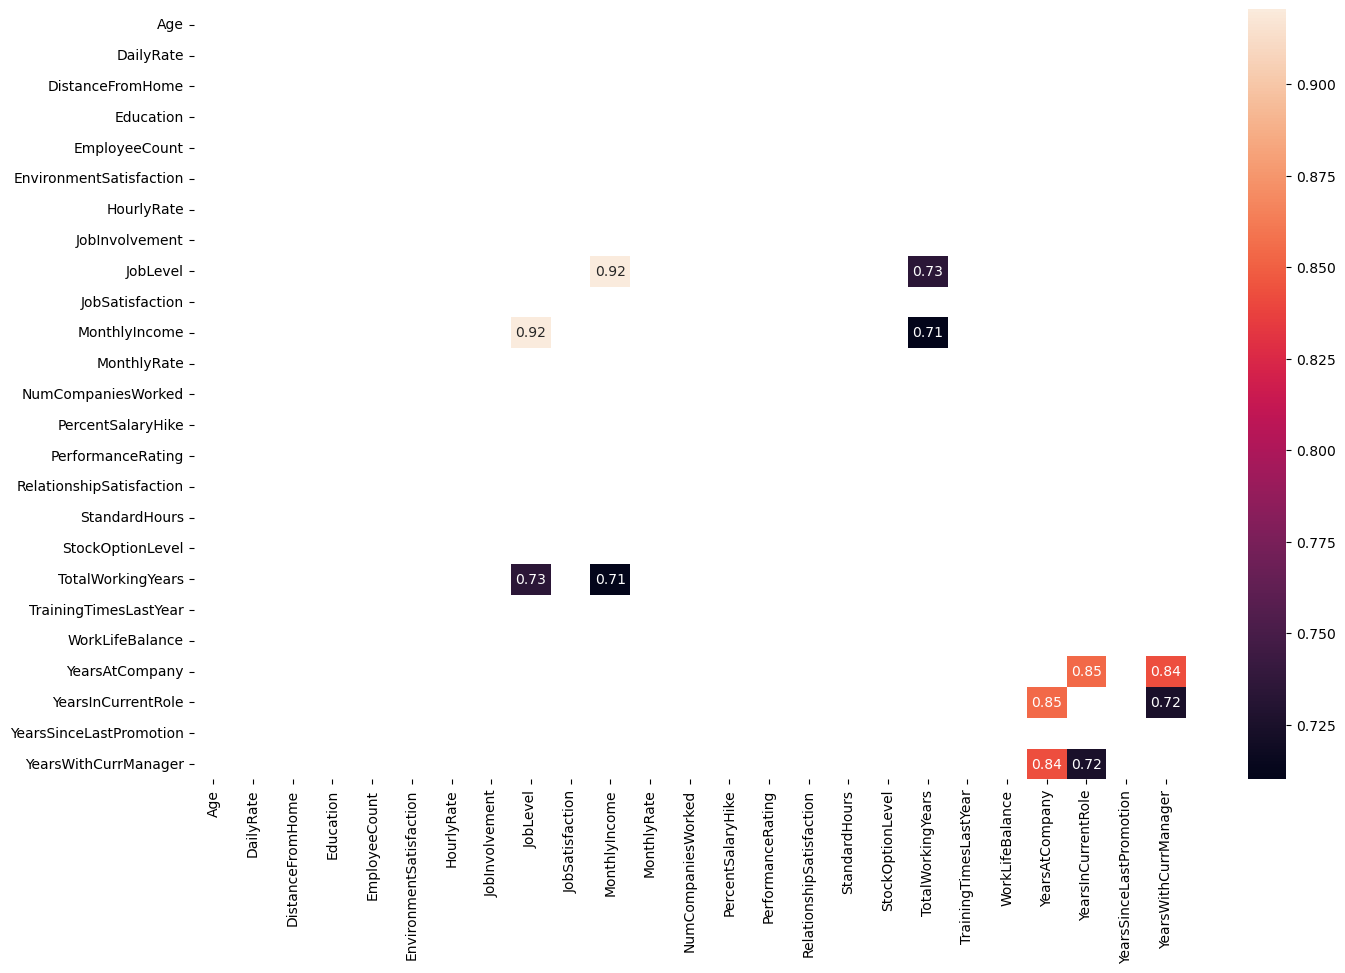

In [26]:
#Spearman correlation

# calculate correlation matrix
hr_corr = hr_int.corr(method='spearman')

# filter correlations to show only those above 0.7 and below 1.0
hr_corr_filtered = hr_corr[(hr_corr >= 0.7) & (hr_corr < 1.0)]

# plot the correlation matrix
plt.figure(figsize=(16,10))
sns.heatmap(hr_corr_filtered, annot=True, fmt = '.2f')

# Pre-Processing

    Actions:

 0   Age                       : binning
 1   Attrition                 : ok
 2   BusinessTravel            : ok
 3   DailyRate                 : check correlation / feature relevance #1
 4   Department                : check correlation / feature relevance #2
 5   DistanceFromHome          : binning
 6   Education                 : ok
 7   EducationField            : ok
 8   EmployeeCount             : remove (only one answer)
 9   EnvironmentSatisfaction   : ok
 10  Gender                    : ok
 11  HourlyRate                : check correlation / feature relevance #1
 12  JobInvolvement            : ok
 13  JobLevel                  : ok
 14  JobRole                   : check correlation / feature relevance #2
 15  JobSatisfaction           : ok
 16  MaritalStatus             : ok
 17  MonthlyIncome             : check correlation / feature relevance #1
 18  MonthlyRate               : check correlation / feature relevance #1
 19  NumCompaniesWorked        : ok
 20  Over18                    : remove (only one answer)
 21  OverTime                  : ok
 22  PercentSalaryHike         : ok
 23  PerformanceRating         : check, higly unbalanced
 24  RelationshipSatisfaction  : ok
 25  StandardHours             : remove (only one answer)
 26  StockOptionLevel          : ok
 27  TotalWorkingYears         : binning
 28  TrainingTimesLastYear     : ok
 29  WorkLifeBalance           : ok
 30  YearsAtCompany            : binning
 31  YearsInCurrentRole        : ok / b
 32  YearsSinceLastPromotion   : ok / b
 33  YearsWithCurrManager      : ok / b

## REMOVAL

In [27]:
hr.drop('EmployeeCount', axis = 1, inplace = True)
hr.drop('Over18', axis = 1, inplace = True)
hr.drop('StandardHours', axis = 1, inplace = True)

# Unsupervised Models

In [52]:
hr_int = hr.select_dtypes(include='int') #used for correlation analysis and k-means clustering
hr_cat = hr.select_dtypes(include='object') #used for categorical variable analysis

In [50]:
# Elbow Method to determine optimal number of clusters
ks = range(1, 15)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k).fit(hr_int)
    inertias.append(model.inertia_)

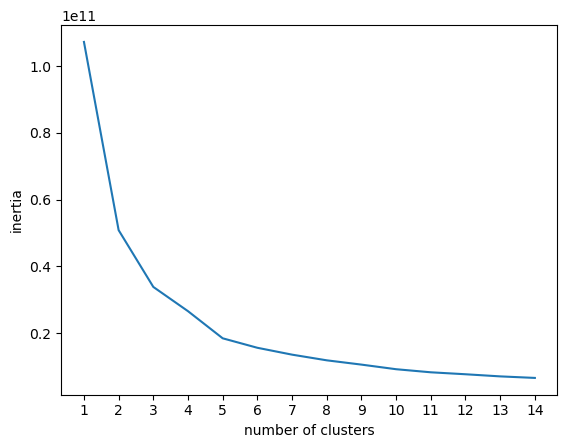

In [34]:
# Plot ks (x-axis) vs inertias (y-axis) using plt.plot().
plt.plot(ks, inertias)

# define the label for the x axis as 'number of clusters' using matplotlib.pyplot.xlabel
plt.xlabel('number of clusters')
# define the label for the y axis as 'inertia' using matplotlib.pyplot.ylabel
plt.ylabel('inertia')
# define the ticks on the x axis using the values of ks
plt.xticks(ks)
# call plt.show()
plt.show()

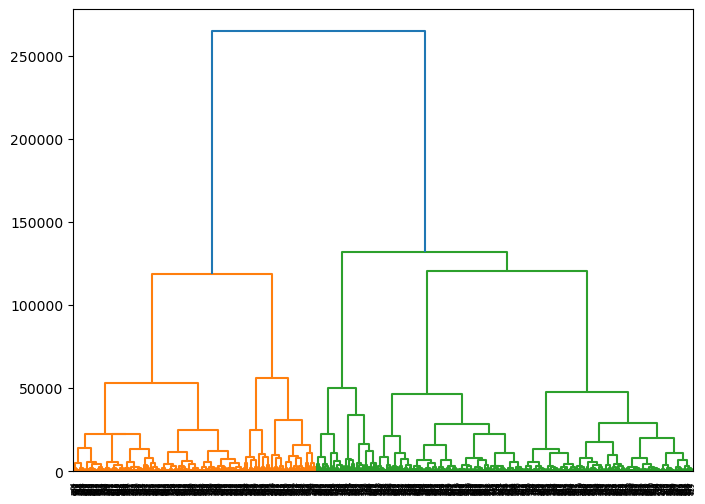

In [35]:

#from sklearn.cluster import AgglomerativeClustering - The option available in sklearn

# Get a random sample, as hierarchical clustering can take a lot of time to run.
hr_int_sample = hr_int.sample(n = 1000, random_state = 100)

# create clusters using the "ward method"
clusters = hierarchy.linkage(hr_int_sample, method="ward")

# create the dendrogram using the hierarchy.dendrogram() method.
plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)

In [36]:
hr_k5 = hr_int.copy()
model_k5 = KMeans(n_clusters=5, random_state = 100).fit(hr_k5)
hr_k5['label'] = model_k5.labels_

hr_k5.groupby(['label']).mean().transpose()

label,0,1,2,3,4
Age,34.554707,35.179487,35.073791,44.095890,45.648649
DailyRate,811.027990,794.717949,805.882952,826.034247,768.020270
DistanceFromHome,8.997455,9.643590,9.150127,9.260274,8.567568
Education,2.941476,2.856410,2.847328,3.000000,3.074324
EnvironmentSatisfaction,2.697201,2.751282,2.737913,2.657534,2.729730
HourlyRate,66.613232,66.528205,65.223919,65.212329,64.736486
JobInvolvement,2.773537,2.746154,2.704835,2.678082,2.689189
JobLevel,1.541985,1.700000,1.646310,3.753425,3.851351
JobSatisfaction,2.770992,2.753846,2.717557,2.657534,2.648649
MonthlyIncome,4181.458015,4737.269231,4539.577608,14301.486301,14840.472973


In [47]:
hr_k3 = hr_int.copy()
model_k3 = KMeans(n_clusters=3, random_state = 100).fit(hr_k3)
hr_k3['label'] = model_k3.labels_

hr_k3.groupby(['label']).mean().transpose()

label,0,1,2
Age,36.072,37.128257,37.611465
DailyRate,806.434,788.146293,813.486200
DistanceFromHome,9.020,9.513026,9.036093
Education,2.926,2.917836,2.893843
EnvironmentSatisfaction,2.680,2.741483,2.745223
HourlyRate,66.408,66.010020,65.216561
JobInvolvement,2.734,2.717435,2.738854
JobLevel,1.900,2.100200,2.199575
JobSatisfaction,2.740,2.753507,2.690021
MonthlyIncome,5844.088,6601.851703,7097.539278


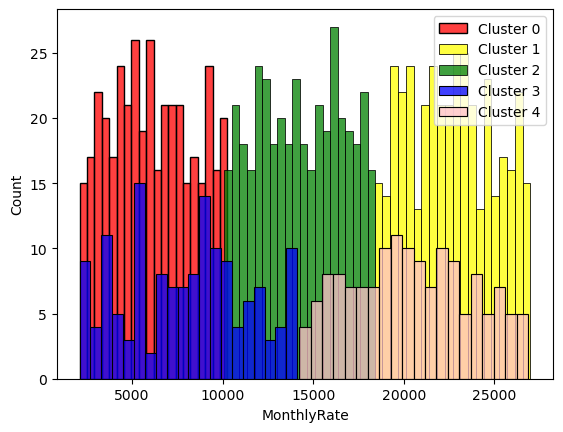

In [46]:
cluster0 = hr_k5[hr_k5.label==0]
cluster1 = hr_k5[hr_k5.label==1]
cluster2 = hr_k5[hr_k5.label==2]
cluster3 = hr_k5[hr_k5.label==3]
cluster4 = hr_k5[hr_k5.label==4]


sns.histplot(cluster0['MonthlyRate'],color='red',label='Cluster 0', bins = 20)
sns.histplot(cluster1['MonthlyRate'],color='yellow',label='Cluster 1', bins = 20)
sns.histplot(cluster2['MonthlyRate'],color='green',label='Cluster 2', bins = 20)
sns.histplot(cluster3['MonthlyRate'],color='blue',label='Cluster 3', bins = 20)
sns.histplot(cluster4['MonthlyRate'],color='pink',label='Cluster 4', bins = 20)
plt.legend()

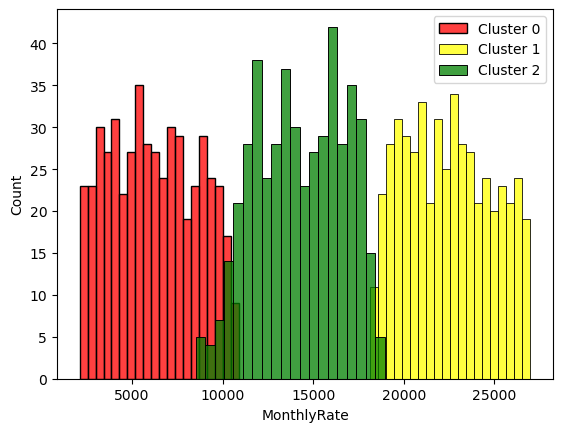

In [48]:
cluster0 = hr_k3[hr_k3.label==0]
cluster1 = hr_k3[hr_k3.label==1]
cluster2 = hr_k3[hr_k3.label==2]



sns.histplot(cluster0['MonthlyRate'],color='red',label='Cluster 0', bins = 20)
sns.histplot(cluster1['MonthlyRate'],color='yellow',label='Cluster 1', bins = 20)
sns.histplot(cluster2['MonthlyRate'],color='green',label='Cluster 2', bins = 20)

plt.legend()

#### Itens que mais se destacam na divisão dos clusters
- MonthlyRate é a que melhor separa os grupos em 5
- MonthlyIncome cria bem duas divisões

## K-Prototypes

In [49]:
from kmodes.kprototypes import KPrototypes

In [56]:
hr_cat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 1 to 2068
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Attrition       1470 non-null   object
 1   BusinessTravel  1470 non-null   object
 2   Department      1470 non-null   object
 3   EducationField  1470 non-null   object
 4   Gender          1470 non-null   object
 5   JobRole         1470 non-null   object
 6   MaritalStatus   1470 non-null   object
 7   OverTime        1470 non-null   object
dtypes: object(8)
memory usage: 103.4+ KB


In [54]:
model = KPrototypes(n_clusters=3, random_state=0)

In [58]:
from kmodes.kprototypes import KPrototypes
import numpy as np

# 1) Identify column types
cat_cols = hr.select_dtypes(include=['object', 'category']).columns.tolist()
num_cols = hr.select_dtypes(include=[np.number]).columns.tolist()

# 2) Get categorical column indices (positions in hr.columns)
cat_idx = [hr.columns.get_loc(c) for c in cat_cols]

# 3) Make a copy and ensure types are KPrototypes-friendly
X = hr.copy()

# KPrototypes wants categorical columns as strings (no NaN) and numeric as numbers
for c in cat_cols:
    X[c] = X[c].astype(str).fillna("NA")

# (optional) handle numeric NaNs if present
for c in num_cols:
    if X[c].isna().any():
        X[c] = X[c].fillna(X[c].median())

# 4) Fit KPrototypes (you can tune gamma/n_init/init as needed)
model = KPrototypes(n_clusters=5, random_state=0, n_init=10, init='Huang')
labels = model.fit_predict(X.to_numpy(), categorical=cat_idx)

# 5) Attach labels and inspect clusters
hr['label'] = labels

display(hr.groupby('label').describe(include=['O']).T)  # categorical summary
display(hr.groupby('label').describe().T)    

label                                       0                       1  \
Attrition      count                      392                     146   
               unique                       2                       2   
               top                         No                      No   
               freq                       320                     132   
BusinessTravel count                      392                     146   
               unique                       3                       3   
               top              Travel_Rarely           Travel_Rarely   
               freq                       279                     104   
Department     count                      392                     146   
               unique                       3                       3   
               top     Research & Development  Research & Development   
               freq                       246                      93   
EducationField count                      392                     146   
               unique                       6                       6   
               top              Life Sciences           Life Sciences   
               freq                       173                      57   
Gender         count                      392                     146   
               unique                       2                       2   
               top                       Male                    Male   
               freq                       231                      83   
JobRole        count                      392                     146   
               unique                       8                       6   
               top            Sales Executive                 Manager   
               freq                       106                      44   
MaritalStatus  count                      392                     146   
               unique                       3                       3   
               top                    Married                 Married   
               freq                       164                      77   
OverTime       count                      392                     146   
               unique                       2                       2   
               top                         No                      No   
               freq                       278                     107   

label                                       2                       3  \
Attrition      count                      144                     388   
               unique                       2                       2   
               top                         No                      No   
               freq                       135                     316   
BusinessTravel count                      144                     388   
               unique                       3                       3   
               top              Travel_Rarely           Travel_Rarely   
               freq                       107                     267   
Department     count                      144                     388   
               unique                       3                       3   
               top     Research & Development  Research & Development   
               freq                       102                     251   
EducationField count                      144                     388   
               unique                       6                       6   
               top              Life Sciences           Life Sciences   
               freq                        61                     163   
Gender         count                      144                     388   
               unique                       2                       2   
               top                       Male                    Male   
               freq                        83                     229   
JobRole        count                      144            

label                                0           1           2           3  \
Age                  count  392.000000  146.000000  144.000000  388.000000   
                     mean    35.211735   44.095890   45.868056   35.077320   
                     std      8.548556    7.784448    7.766025    8.472738   
                     min     18.000000   27.000000   29.000000   18.000000   
                     25%     29.000000   39.000000   40.000000   29.000000   
...                                ...         ...         ...         ...   
YearsWithCurrManager min      0.000000    0.000000    0.000000    0.000000   
                     25%      1.750000    2.000000    2.000000    2.000000   
                     50%      2.500000    7.000000    7.000000    2.000000   
                     75%      7.000000    9.000000    9.000000    7.000000   
                     max     17.000000   17.000000   17.000000   15.000000   

label                                4  
Age                  count  400.000000  
                     mean    34.555000  
                     std      7.928691  
                     min     18.000000  
                     25%     29.000000  
...                                ...  
YearsWithCurrManager min      0.000000  
                     25%      2.000000  
                     50%      3.000000  
                     75%      7.000000  
                     max     17.000000  

[184 rows x 5 columns]

# FEATURE SELECTION

In [59]:
skf = StratifiedKFold(n_splits = 3, random_state = 99, shuffle = True)

In [60]:
hr['Attrition'] = hr['Attrition'].map({'Yes': 1, 'No': 0})

In [61]:
X = hr.drop('Attrition', axis = 1)
y = hr['Attrition'].copy()

### Categorical Features

In [62]:
def apply_chisquare(X, y, var, alpha=0.05):
    dfObserved = pd.crosstab(y, X)
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
    if p<alpha:
        result="{0} is IMPORTANT for Prediction".format(var)
    else:
        result="{0} is NOT an important predictor. (Discard {0} from model)".format(var)
    print(result)

In [63]:
def select_best_cat_features(X, y):
    count = 1

    ############################################## APPLY SKF ######################################################
    for train_index, val_index in skf.split(X, y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        #################################### SELECT FEATURES WITH CHI-SQUARE #######################################
        print('_________________________________________________________________________________________________\n')
        print('                                     SPLIT ' + str(count) + '                                    \n')

        # check which features to use using chi-square
        X_train_cat = X_train[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']].copy()
        for var in X_train_cat:
            apply_chisquare(X_train_cat[var], y_train, var)

        count+=1

In [64]:
select_best_cat_features(X, y)

_________________________________________________________________________________________________

                                     SPLIT 1                                    

BusinessTravel is IMPORTANT for Prediction
Department is IMPORTANT for Prediction
EducationField is IMPORTANT for Prediction
Gender is NOT an important predictor. (Discard Gender from model)
JobRole is IMPORTANT for Prediction
MaritalStatus is IMPORTANT for Prediction
OverTime is IMPORTANT for Prediction
_________________________________________________________________________________________________

                                     SPLIT 2                                    

BusinessTravel is IMPORTANT for Prediction
Department is NOT an important predictor. (Discard Department from model)
EducationField is IMPORTANT for Prediction
Gender is NOT an important predictor. (Discard Gender from model)
JobRole is IMPORTANT for Prediction
MaritalStatus is IMPORTANT for Prediction
OverTime is IMPORTANT for Pr

| Predictor | Chi-Square | What to do? (One possible way to "solve")|
| --- | --- | --- |
| BusinessTravel | 3 YES | Keep |
| Department | 2 YES | Keep|
| EducationField | 2 YES|Keep|
| Gender | 3 NO | Remove|
| JobRole | 3 YES|Keep|
| MaritalStatus | 3 YES|Keep|
| OverTime | 3 YES|Keep|

In [65]:
X = X.drop(['Gender'], axis = 1)

### Numerical Features

In [66]:
def apply_variance(X_train, var):
  print(var + ':' + str(X_train.var()))

In [67]:
def select_features_variance(X, y):
    count = 1
    numerical_columns = X.select_dtypes(include=[np.number]).columns

    ############################################## APPLY SKF ######################################################
    for train_index, val_index in skf.split(X,y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        #################################### SELECT FEATURES WITH VARIANCE ########################################
        print('_________________________________________________________________________________________________\n')
        print('                                     SPLIT ' + str(count) + '                                    \n')

        # check which features to use using variance
        for var in numerical_columns:
          apply_variance(X_train[var], var)

        count+=1

In [68]:
select_features_variance(X, y)

_________________________________________________________________________________________________

                                     SPLIT 1                                    

Age:85.15073273436033
DailyRate:164806.129532426
DistanceFromHome:65.3199391298907
Education:1.0543151070438361
EnvironmentSatisfaction:1.2412280336036228
HourlyRate:409.10009276437853
JobInvolvement:0.5073648662733798
JobLevel:1.2769214733901786
JobSatisfaction:1.1711440245148055
MonthlyIncome:23178356.985240076
MonthlyRate:51094531.23767589
NumCompaniesWorked:6.230847803881525
PercentSalaryHike:13.313464384732434
PerformanceRating:0.12547580830084964
RelationshipSatisfaction:1.1257165787663275
StockOptionLevel:0.7159909111755017
TotalWorkingYears:64.10524170853225
TrainingTimesLastYear:1.7193085405766142
WorkLifeBalance:0.48845760980592834
YearsAtCompany:38.94055158324837
YearsInCurrentRole:13.544833336807686
YearsSinceLastPromotion:9.858425923995805
YearsWithCurrManager:12.40847595422223
label:2.437675887

No variables without variation

### Spearman Correlation

In [69]:
def cor_heatmap(cor):
    plt.figure(figsize=(16,10))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.2f')
    plt.show()

In [73]:
def apply_correlation(X_train):
    #correlation_data = X_train.drop(['Dependents'], axis = 1).copy()
    correlation_data = X_train.copy()
    matrix = correlation_data.corr(method = 'spearman', numeric_only = True)
    matrix2 = matrix[(matrix >= 0.7) & (matrix < 1.0)]
    cor_heatmap(matrix2)

In [74]:
def redundant_features(X, y):
    count = 1

    ############################################## APPLY SKF ######################################################
    for train_index, val_index in skf.split(X,y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        ######################################### SELECT FEATURES #################################################
        print('_________________________________________________________________________________________________\n')
        print('                                     SPLIT ' + str(count) + '                                    \n')

        # check which features to use using spearman correlation
        apply_correlation(X_train)

        count+=1

_________________________________________________________________________________________________

                                     SPLIT 1                                    



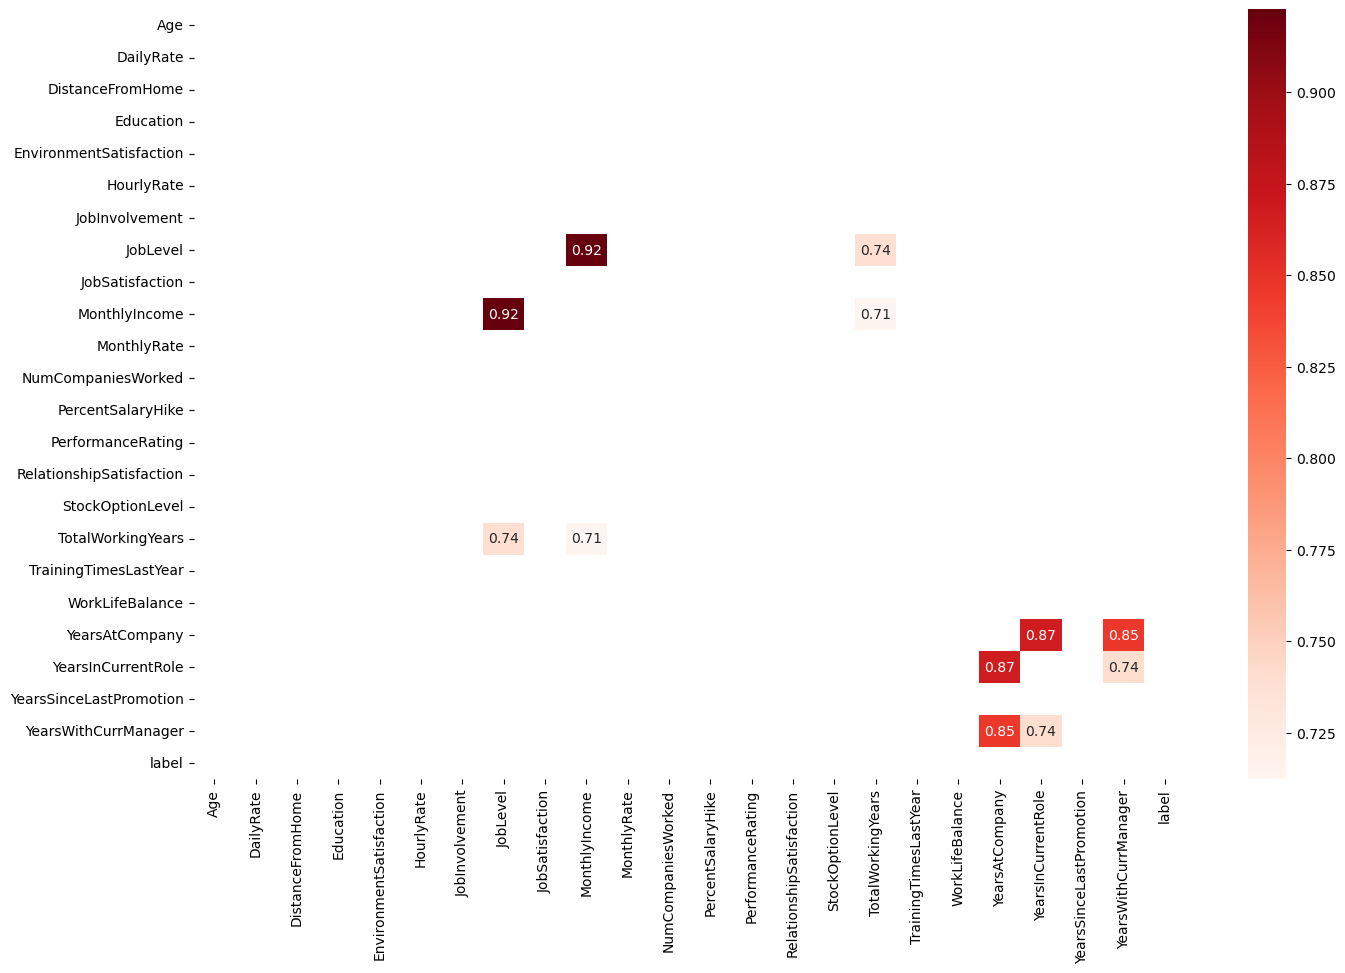

_________________________________________________________________________________________________

                                     SPLIT 2                                    



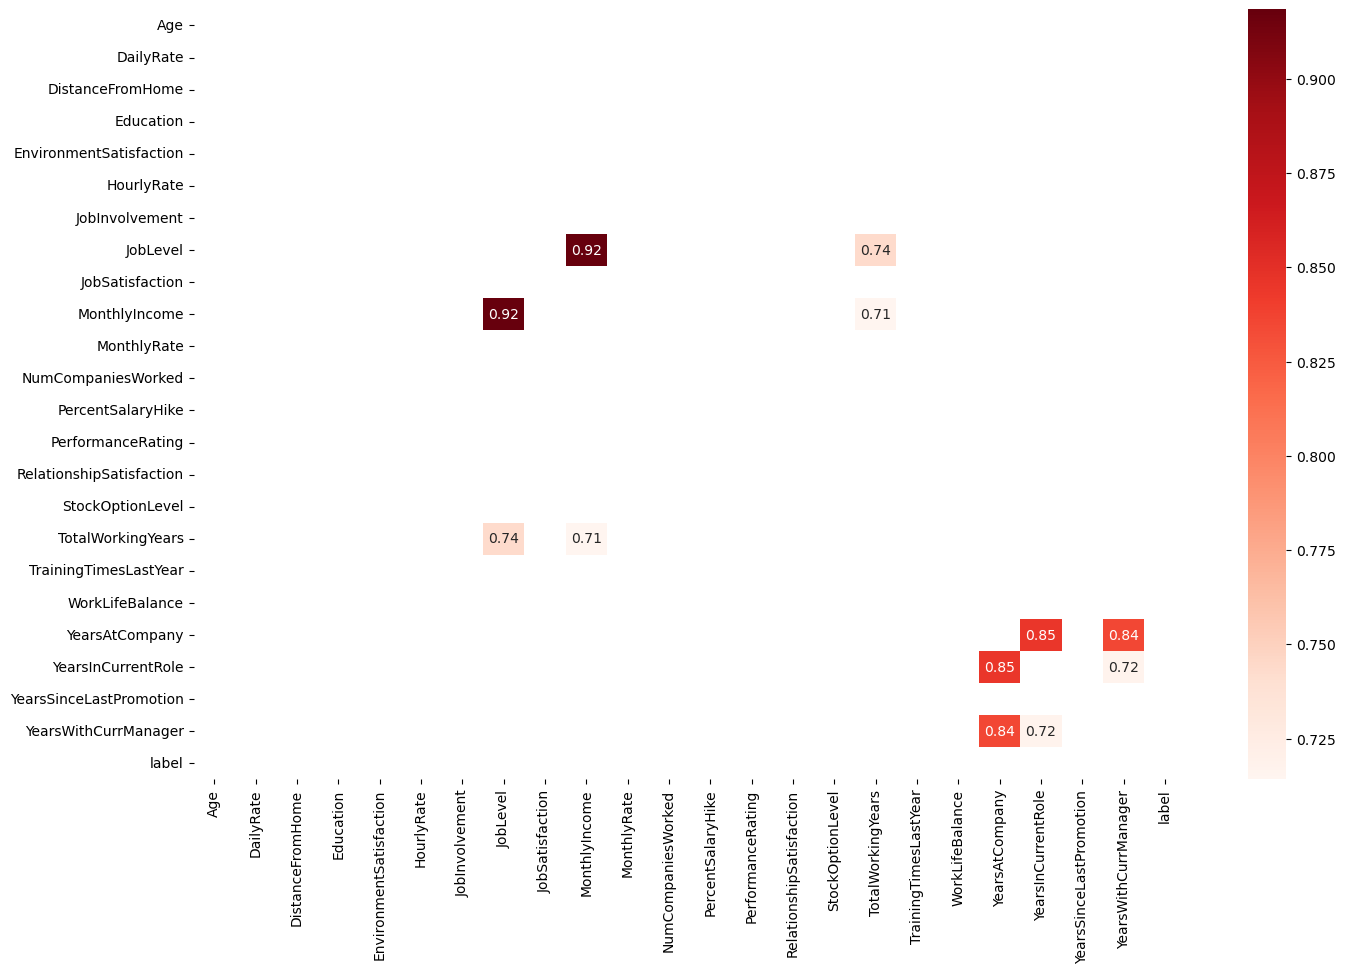

_________________________________________________________________________________________________

                                     SPLIT 3                                    



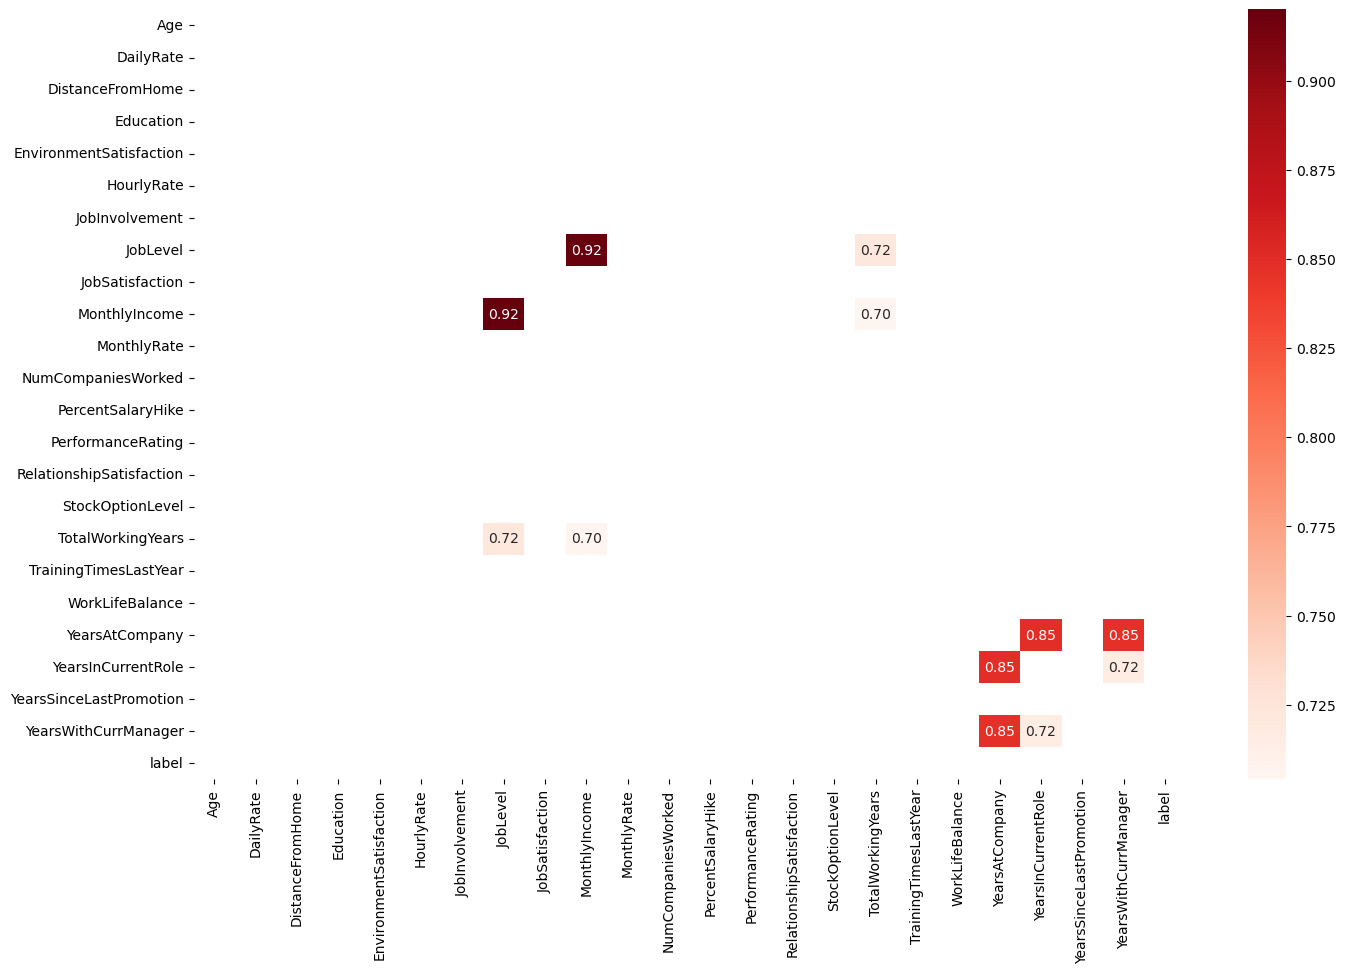

In [75]:
redundant_features(X, y)

| Combination | Split 1 | Split 2 | Split 3 |
| --- | --- | --- | --- |
| Age Vs TotalWorkingYears | 0.7 | 0.7 | 0.6 |
| JobLevel Vs MonthlyIncome | 0.9 | 0.9 | 0.9 |
| JobLevel Vs TotalWorkingYears | 0.7 | 0.7 | 0.7 |
| MonthlyIncome Vs TotalWorkingYears | 0.7 | 0.7 | 0.7 |
| YearsAtCompany Vs YearsInCurrentRole | 0.9 | 0.8 | 0.8 |
| YearsAtCompany Vs YearsWithCurrManager | 0.8 | 0.8 | 0.8 |
| YearsInCurrentRole Vs YearsWithCurrManager | 0.7 | 0.7 | 0.7 |

### Decision Trees

In [131]:
def plot_importance(variables, name):
    imp_features = variables.sort_values()
    plt.figure(figsize=(4,5))
    imp_features.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

In [132]:
def apply_dt(X_train, y_train):
    dt = DecisionTreeClassifier(random_state = 99).fit(X_train, y_train)
    feature_importances = pd.Series(dt.feature_importances_, index = X_train.columns)
    plot_importance(feature_importances, 'DT')

In [133]:
def select_best_features_dt(X, y):
    count = 1

    ############################################## APPLY SKF ######################################################
    for train_index, val_index in skf.split(X,y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        ######################################### SELECT FEATURES #################################################
        print('_________________________________________________________________________________________________\n')
        print('                                     SPLIT ' + str(count) + '                                    \n')

        # check which features to use using decision Tree
        X_train = X_train.drop(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime'], axis = 1)
        apply_dt(X_train, y_train)

        count+=1

_________________________________________________________________________________________________

                                     SPLIT 1                                    



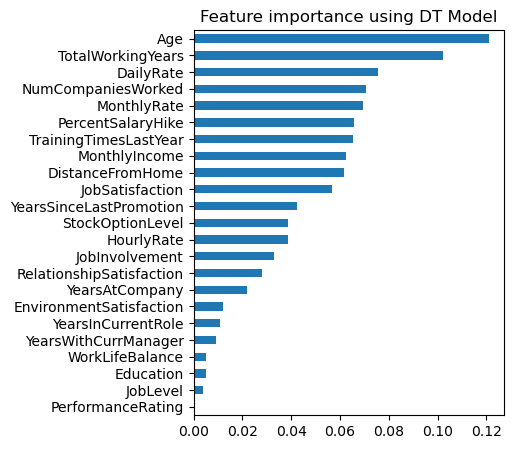

_________________________________________________________________________________________________

                                     SPLIT 2                                    



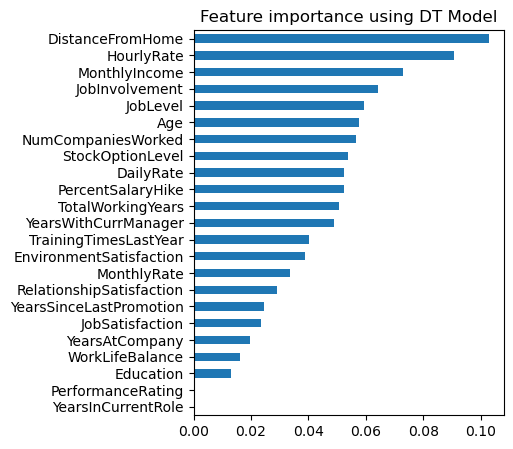

_________________________________________________________________________________________________

                                     SPLIT 3                                    



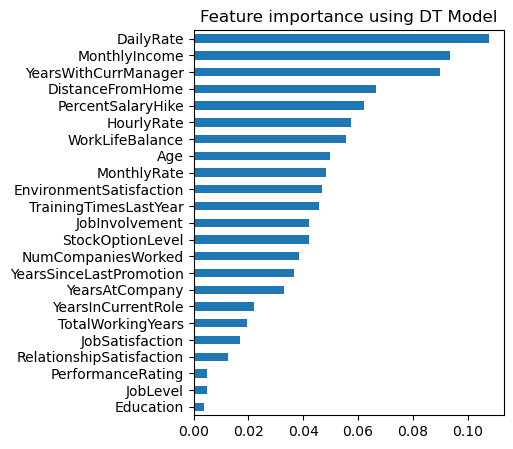

In [134]:
select_best_features_dt(X, y)

| DT Ranking | Split 1 | Split 2 | Split 3 |
| --- | --- | --- | --- |
| Age | 1 | 3 | 2 |
| MonthlyIncome | 3 | 1 | 1 |
| JobLevel | 4 | 2 | 4 |
| TotalWorkingYears | 2 | 4 | 3 |
| --- | --- | --- | --- |
| YearsAtCompany | 1 | 2 | 2 |
| YearsWithCurrManager | 3 | 1 | 1 |
| YearsInCurrentRole | 2 | 3 | 3 |

In [53]:
X = X.drop(['Age','JobLevel','TotalWorkingYears','YearsAtCompany', 'YearsInCurrentRole'], axis = 1)

In [55]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 1 to 2068
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   BusinessTravel            1470 non-null   object
 1   DailyRate                 1470 non-null   int64 
 2   Department                1470 non-null   object
 3   DistanceFromHome          1470 non-null   int64 
 4   Education                 1470 non-null   int64 
 5   EducationField            1470 non-null   object
 6   EnvironmentSatisfaction   1470 non-null   int64 
 7   HourlyRate                1470 non-null   int64 
 8   JobInvolvement            1470 non-null   int64 
 9   JobRole                   1470 non-null   object
 10  JobSatisfaction           1470 non-null   int64 
 11  MaritalStatus             1470 non-null   object
 12  MonthlyIncome             1470 non-null   int64 
 13  MonthlyRate               1470 non-null   int64 
 14  NumCompaniesWorked        147

### RFE

In [54]:
def apply_rfe(X_train, y_train):
    rfe = RFE(estimator = LogisticRegression(), n_features_to_select = 5)
    rfe.fit_transform(X = X_train, y = y_train)
    selected_features = pd.Series(rfe.support_, index = X_train.columns)
    print(selected_features)

In [136]:
def apply_lasso(X_train, y_train):
    #X_train = X_train.drop(['OverTime'], axis = 1)
    lasso = LassoCV().fit(X_train, y_train)
    coef = pd.Series(lasso.coef_, index = X_train.columns)
    plot_importance(coef,'Lasso')

In [137]:
def select_best_features(X, y):
    count = 1

    ############################################## APPLY SKF ######################################################
    for train_index, val_index in skf.split(X,y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        ########################################### SCALE DATA ####################################################
        numerical_data = X_train.drop(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime'], axis = 1).copy()
        scaler = MinMaxScaler().fit(numerical_data)
        X_train_scaled = scaler.transform(numerical_data)
        X_train_scaled = pd.DataFrame(X_train_scaled, columns = numerical_data.columns)

        ######################################### SELECT FEATURES #################################################
        print('_________________________________________________________________________________________________\n')
        print('                                     SPLIT ' + str(count) + '                                    \n')

        # Check which features to use using RFE
        print('')
        print('------------------ RFE ----------------------')
        apply_rfe(X_train_scaled, y_train)

        # check which features to use using lasso
        print('')
        print('----------------- LASSO ----------------------')
        apply_lasso(X_train_scaled, y_train)

        # check which features to use using decision tree
        print('')
        print('------------------ DT -----------------------')
        apply_dt(X_train_scaled, y_train)

        count+=1

_________________________________________________________________________________________________

                                     SPLIT 1                                    


------------------ RFE ----------------------
Age                         False
DailyRate                   False
DistanceFromHome            False
Education                   False
EnvironmentSatisfaction     False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobSatisfaction             False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StockOptionLevel             True
TotalWorkingYears            True
TrainingTimesLastYear       False
WorkLifeBalance             False
YearsAtCompany              False
YearsInCurrentRole           True
YearsSinceLastPromotion      True
YearsWithCurrManager    

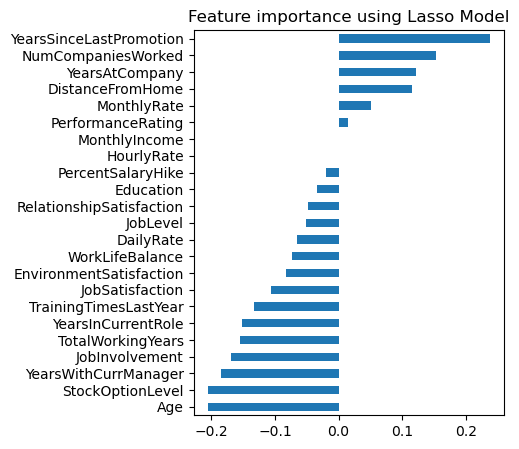


------------------ DT -----------------------


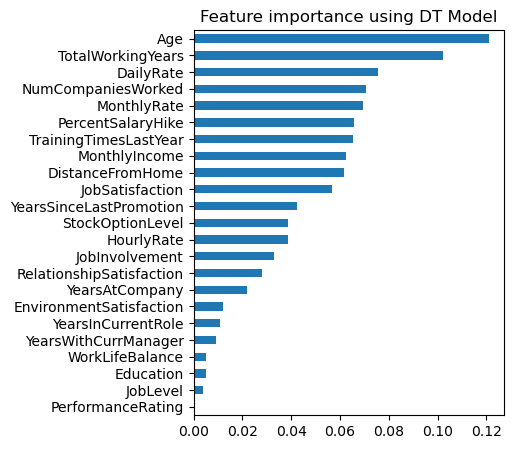

_________________________________________________________________________________________________

                                     SPLIT 2                                    


------------------ RFE ----------------------
Age                         False
DailyRate                   False
DistanceFromHome            False
Education                   False
EnvironmentSatisfaction     False
HourlyRate                  False
JobInvolvement               True
JobLevel                     True
JobSatisfaction             False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StockOptionLevel             True
TotalWorkingYears            True
TrainingTimesLastYear       False
WorkLifeBalance             False
YearsAtCompany              False
YearsInCurrentRole           True
YearsSinceLastPromotion     False
YearsWithCurrManager    

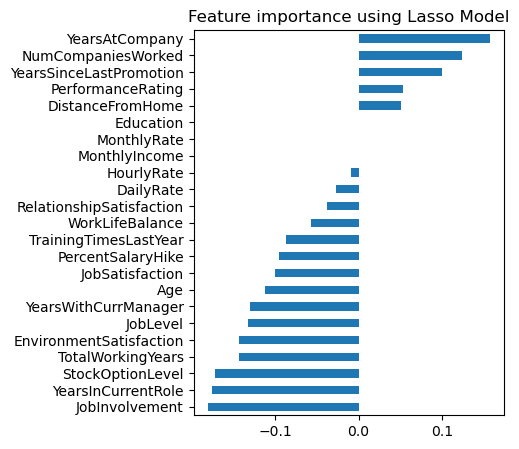


------------------ DT -----------------------


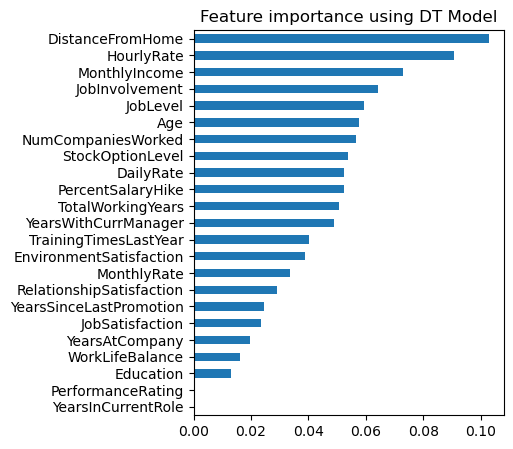

_________________________________________________________________________________________________

                                     SPLIT 3                                    


------------------ RFE ----------------------
Age                         False
DailyRate                   False
DistanceFromHome            False
Education                   False
EnvironmentSatisfaction     False
HourlyRate                  False
JobInvolvement               True
JobLevel                    False
JobSatisfaction             False
MonthlyIncome                True
MonthlyRate                 False
NumCompaniesWorked          False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesLastYear       False
WorkLifeBalance             False
YearsAtCompany              False
YearsInCurrentRole           True
YearsSinceLastPromotion      True
YearsWithCurrManager    

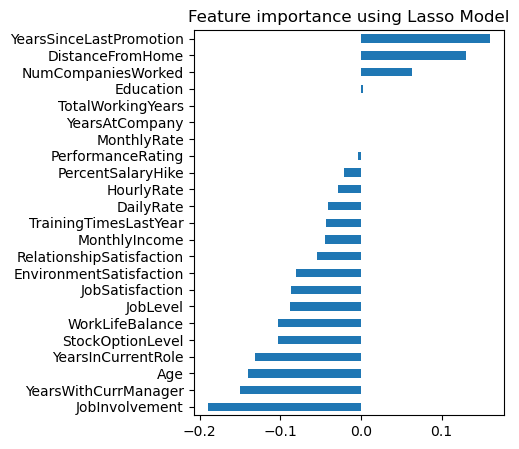


------------------ DT -----------------------


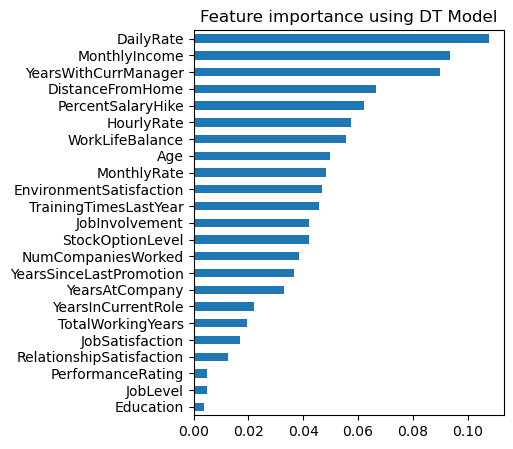

In [138]:
select_best_features(X, y)

| Predictor | Chi-Quare | RFE | Lasso | DT | What to do? (One possible way to "solve") |
| --- |--- | --- | --- | --- | --- |
BusinessTravel | 3 | X | X | X | KEEP |
Department | 2 | X | X | X | ALL |
EducationField | 2 | X | X | X | ALL |
Gender | 0 | X | X | X | REMOVE |
JobRole | 3 | X | X | X | KEEP |
MaritalStatus | 3 | X | X | X | ALL |
OverTime | 3 | X | X | X | ALL |
Age | X | X | 1 | 1 | ALL |
DailyRate | X | X | X | 1 | ALL |
DistanceFromHome | X | X | X | 1 | ALL |
Education | X | X | X | X | REMOVE |
EnvironmentSatisfaction | X | X | X | X | REMOVE |
HourlyRate | X | X | X | 1 | ALL |
JobInvolvement | X | 2 | 2 | X | KEEP |
JobLevel | X | 1 | X | X | ALL |
JobSatisfaction | X | X | X | X | REMOVE |
MonthlyIncome | X | 1 | X | 1 | ALL |
MonthlyRate | X | X | X | X | REMOVE |
NumCompaniesWorked | X | X | X | X | REMOVE |
PercentSalaryHike | X | X | X | X | REMOVE |
PerformanceRating | X | X | X | X | REMOVE |
RelationshipSatisfaction | X | X | X | X | REMOVE |
StockOptionLevel | X | 2 | 2 | X | KEEP |
TotalWorkingYears | X | 2 | X | 1 | KEEP |
TrainingTimesLastYear | X | X | X | X | REMOVE |
WorkLifeBalance | X | X | X | X | REMOVE |
YearsAtCompany | X | X | 1 | X | ALL |
YearsInCurrentRole | X | 3 | 1 | X | KEEP |
YearsSinceLastPromotion | X | 2 | 2 | X | KEEP |
YearsWithCurrManager | X | 2 | 1 | 1 | KEEP |

In [157]:
keep_data = hr[['Attrition', 'BusinessTravel', 'JobRole', 'JobInvolvement', 'StockOptionLevel', 
                'TotalWorkingYears', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 
                'YearsWithCurrManager']].copy()
all_data = hr[['Attrition', 'BusinessTravel', 'JobRole', 'JobInvolvement', 'StockOptionLevel', 
               'TotalWorkingYears', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 
               'YearsWithCurrManager', 'Department', 'EducationField', 'MaritalStatus', 
               'OverTime', 'Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 
               'JobLevel', 'MonthlyIncome', 'YearsAtCompany']].copy()

In [158]:
def encode_data(dataset):

    ########################################## CREATE DUMMIES #################################################
    # Create dummies and remove one of the variables (to avoid multicollinearity)
    data_dummies = pd.get_dummies(dataset, drop_first=True)

    return data_dummies

In [169]:
def select_best_models(data, model):
    skf = StratifiedKFold(n_splits = 5, random_state = 99, shuffle = True)
    X = data.drop('Attrition', axis = 1)
    y = data['Attrition'].copy()

    X = encode_data(X)

    score_train, score_val = [],[]

    # perform the cross-validation
    for train_index, val_index in skf.split(X,y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        # scale the data
        scaler = MinMaxScaler().fit(X_train)
        X_train = scaler.transform(X_train)
        X_val = scaler.transform(X_val)

        # apply model
        model.fit(X_train, y_train)
        predictions_train = model.predict(X_train)
        predictions_val = model.predict(X_val)
        score_train.append(f1_score(y_train, predictions_train))
        score_val.append(f1_score(y_val, predictions_val))

    avg_train = round(np.mean(score_train),3)
    avg_val = round(np.mean(score_val),3)
    std_train = round(np.std(score_train),2)
    std_val = round(np.std(score_val),2)

    return avg_train, std_train, avg_val, std_val

In [170]:
def show_results(df, data, *args):
    count = 0
    # for each instance of model passed as argument
    for arg in args:
        avg_train, std_train, avg_val, std_val = select_best_models(data, arg)
        # store the results in the right row
        df.iloc[count] = str(avg_train) + '+/-' + str(std_train), str(avg_val) + '+/-' + str(std_val)
        count+=1
    return df

In [171]:
model_KNN = KNeighborsClassifier()
model_DT = DecisionTreeClassifier(max_depth = 3, random_state = 99)
model_NN = MLPClassifier(max_iter = 2000, random_state = 99)

In [172]:
df_all = pd.DataFrame(columns = ['Train','Validation'], index = ['KNN','DT','NN'])

In [173]:
show_results(df_all, all_data, model_KNN, model_DT, model_NN)

,Train,Validation
KNN,0.438+/-0.02,0.266+/-0.06
DT,0.356+/-0.03,0.246+/-0.08
NN,0.999+/-0.0,0.377+/-0.06


In [174]:
df_keep = pd.DataFrame(columns = ['Train','Validation'], index = ['KNN','DT','NN'])

In [175]:
show_results(df_keep, keep_data, model_KNN, model_DT, model_NN)

,Train,Validation
KNN,0.441+/-0.03,0.256+/-0.05
DT,0.216+/-0.06,0.157+/-0.05
NN,0.598+/-0.02,0.289+/-0.05


In [176]:
def point_plot(train, validation, values_try):
    sns.pointplot(x=values_try, y=train, color = 'teal', label = 'Train')
    sns.pointplot(x=values_try, y=validation, color = 'goldenrod', label = 'Validation')
    plt.legend()

In [177]:
def get_models_knn(data, values):
    models = dict()
    results_train, results_val, names = [],[],[]

    # create the instances of each model with different values
    for value in values:
        models['neighbors_' + str(value)] = KNeighborsClassifier(n_neighbors = value)

    for name, model in models.items():
        avg_train, std_train, avg_val, std_val = select_best_models(data, model)
        results_train.append(avg_train)
        results_val.append(avg_val)
        names.append(name)

    print(results_train)
    print(results_val)

    return results_train, results_val

[1.0, 0.543, 0.438, 0.364, 0.303, 0.254]
[0.271, 0.287, 0.266, 0.232, 0.207, 0.194]


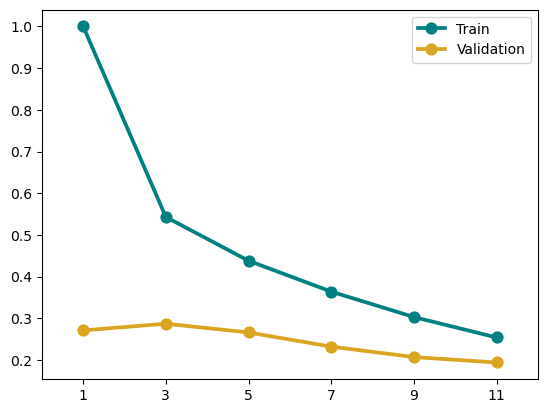

In [180]:
# DO IT
values_try = [1,3,5,7,9,11]
results_train, results_val = get_models_knn(all_data, values_try)
point_plot(results_train, results_val, values_try)  #quanto mais neighbors, menos overfit

In [181]:
final_model_knn = KNeighborsClassifier(n_neighbors = 3)

In [182]:
def get_models_dt(data, values):
    models = dict()
    results_train, results_val, names = [],[],[]

    # create the instances of each model with different values
    for value in values:
        models['depth_' + str(value)] = DecisionTreeClassifier(max_depth = value, random_state = 99)

    for name, model in models.items():
        avg_train, std_train, avg_val, std_val = select_best_models(data, model)
        results_train.append(avg_train)
        results_val.append(avg_val)
        names.append(name)

    return results_train, results_val

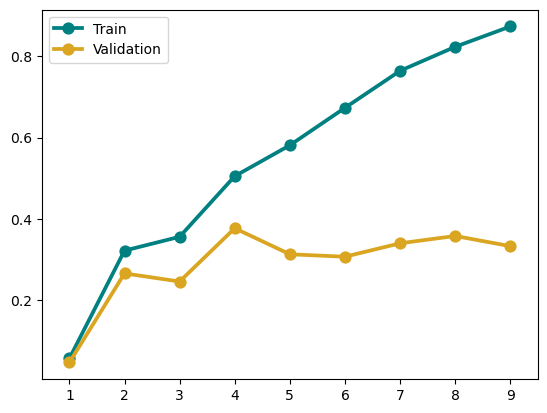

In [183]:
values_try = [1,2,3,4,5,6,7,8,9]
results_train, results_val = get_models_dt(all_data, values_try)
point_plot(results_train, results_val, values_try)  #maior o numero de branches, mais overfit vai ter

In [208]:
final_model_dt = DecisionTreeClassifier(max_depth = 4, random_state = 99)

In [189]:
def get_models_nn(data, values):
    models = dict()
    results_train, results_val, names = [],[],[]

    # create the instances of each model with different values
    for value in values:
        models[str(value)] = MLPClassifier(hidden_layer_sizes = value, max_iter = 2000, random_state = 99)

    for name, model in models.items():
        avg_train, std_train, avg_val, std_val = select_best_models(data, model)
        results_train.append(avg_train)
        results_val.append(avg_val)
        names.append(name)

    return results_train, results_val, names

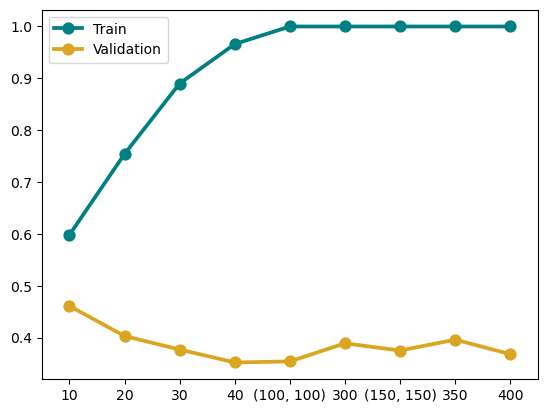

In [193]:
values_try = [(10),(20),(30),(40),(100,100),(300),(150,150),(350),(400)] #ir na documentação e testar os diferentes parametros para todos os modelos
results_train, results_val, names = get_models_nn(all_data, values_try)
point_plot(results_train, results_val, names)

In [195]:
data = all_data.copy()

X_data = data.drop(['Attrition'], axis = 1)
y_data = data['Attrition'].copy()

X_data = encode_data(X_data)
scaler = MinMaxScaler()
X_data = scaler.fit_transform(X_data)

In [196]:
nn = MLPClassifier(max_iter = 2000, random_state = 99)

In [198]:
parameter_space_random = {
    'hidden_layer_sizes': [(10),(20),(30),(40),(50)],
    'learning_rate_init': [0.0001, 0.001, 0.01, 0.1],
    'learning_rate': ['constant', 'invscaling','adaptive'],
    'solver': ['sgd','adam'],
    'activation': ['logistic','relu'],
    'alpha': [0.0001, 0.001, 0.01, 0.1]
}

In [199]:
random_search = RandomizedSearchCV(nn, param_distributions=parameter_space_random,
                                   scoring='f1', cv=5, random_state=99)

In [201]:
random_search.fit(X_data, y_data)

# Print the best hyperparameters and corresponding score
print("Best Hyperparameters: ", random_search.best_params_)
print("Best Score: ", random_search.best_score_)

Best Hyperparameters:  {'solver': 'adam', 'learning_rate_init': 0.001, 'learning_rate': 'adaptive', 'hidden_layer_sizes': 40, 'alpha': 0.001, 'activation': 'logistic'}
Best Score:  0.45341952994192714


In [202]:
parameter_space_grid = {
    'hidden_layer_sizes': [(40)],
    'learning_rate_init': [0.01, 0.005, 0.015],
    'learning_rate': ['constant'],
    'solver': ['sgd','adam'],
    'activation': ['relu']
}

In [203]:
grid_search = GridSearchCV(nn, parameter_space_grid, scoring='f1', return_train_score=True, cv=5)

In [204]:
grid_search.fit(X_data, y_data)

# Print the best hyperparameters and corresponding score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Hyperparameters:  {'activation': 'relu', 'hidden_layer_sizes': 40, 'learning_rate': 'constant', 'learning_rate_init': 0.005, 'solver': 'sgd'}
Best Score:  0.44452206389802296


In [206]:
final_model_nn = MLPClassifier(activation = 'relu',
                               hidden_layer_sizes = (40),
                               learning_rate = 'adaptive',
                               learning_rate_init = 0.001,
                               solver = 'adam', max_iter = 2000, random_state = 99)

In [209]:
df_final_models = pd.DataFrame(columns = ['Train','Validation'], index = ['Best KNN','Best DT','Best NN'])
show_results(df_final_models, all_data, final_model_knn, final_model_dt, final_model_nn)

,Train,Validation
Best KNN,0.543+/-0.01,0.287+/-0.06
Best DT,0.505+/-0.06,0.377+/-0.06
Best NN,0.966+/-0.01,0.352+/-0.06


In [219]:
data = all_data.copy()

X_data = data.iloc[:,1:]
y_data = data.iloc[:,0:1]

In [220]:
y_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 1 to 2068
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Attrition  1470 non-null   int64
dtypes: int64(1)
memory usage: 23.0 KB


In [221]:
X_data = encode_data(X_data)

In [222]:
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data,
                                                  train_size = 0.8,
                                                  random_state = 99,
                                                  stratify = y_data)

scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

model_knn = final_model_knn.fit(X_train, y_train)
model_dt = final_model_dt.fit(X_train, y_train)
model_nn = final_model_nn.fit(X_train, y_train)

In [223]:
prob_modelKNN = model_knn.predict_proba(X_val)
prob_modelDT =  model_dt.predict_proba(X_val)
prob_modelNN =  model_nn.predict_proba(X_val)

In [224]:
prob_modelNN

array([[1.29124935e-01, 8.70875065e-01],
       [9.94535066e-01, 5.46493370e-03],
       [9.99455966e-01, 5.44034416e-04],
       [9.99932442e-01, 6.75584213e-05],
       [9.99999447e-01, 5.53259264e-07],
       [6.63766185e-01, 3.36233815e-01],
       [7.59931058e-01, 2.40068942e-01],
       [9.99997929e-01, 2.07109307e-06],
       [9.76355094e-01, 2.36449059e-02],
       [9.99546523e-01, 4.53476949e-04],
       [9.99978506e-01, 2.14941420e-05],
       [9.99999995e-01, 5.09315860e-09],
       [9.90385937e-01, 9.61406268e-03],
       [9.92941859e-01, 7.05814051e-03],
       [9.35094033e-01, 6.49059666e-02],
       [8.15430769e-01, 1.84569231e-01],
       [9.99976249e-01, 2.37510020e-05],
       [9.99809660e-01, 1.90340442e-04],
       [9.62236674e-01, 3.77633259e-02],
       [9.90729442e-01, 9.27055803e-03],
       [1.00000000e+00, 8.25503119e-11],
       [4.54869869e-01, 5.45130131e-01],
       [1.16190772e-07, 9.99999884e-01],
       [9.97616900e-01, 2.38310044e-03],
       [9.998123

In [225]:
fpr_modelKNN, tpr_modelKNN, thresholds_modelKNN = roc_curve(y_true = y_val, y_score = prob_modelKNN[:,1])
fpr_modelDT, tpr_modelDT, thresholds_modelDT = roc_curve(y_val, prob_modelDT[:,1])
fpr_modelNN, tpr_modelNN, thresholds_modelNN = roc_curve(y_val, prob_modelNN[:,1])

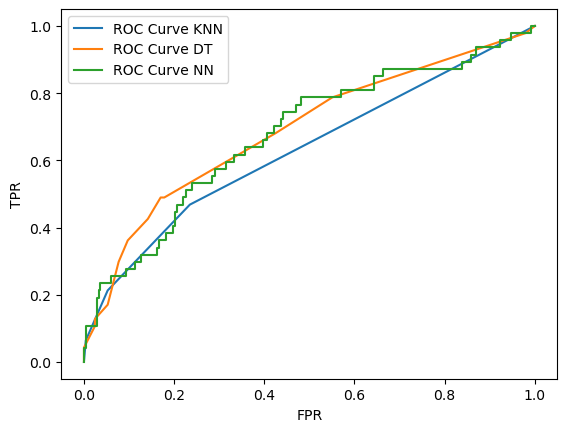

In [226]:
plt.plot(fpr_modelKNN, tpr_modelKNN,label="ROC Curve KNN")
plt.plot(fpr_modelDT, tpr_modelDT, label="ROC Curve DT")
plt.plot(fpr_modelNN, tpr_modelNN, label="ROC Curve NN")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

In [227]:
roc_auc_modelKNN = roc_auc_score(y_val, prob_modelKNN[:, 1])
roc_auc_modelDT = roc_auc_score(y_val, prob_modelDT[:, 1])
roc_auc_modelNN = roc_auc_score(y_val, prob_modelNN[:, 1])
print(roc_auc_modelKNN )
print(roc_auc_modelDT)
print(roc_auc_modelNN)

0.6305452666034973
0.6884313894392282
0.6771470410888105


In [228]:
print(prob_modelDT.shape)

(294, 2)


In [229]:
final_model = final_model_dt.fit(X_train, y_train)

In [230]:
predict_proba = final_model.predict_proba(X_val)
predict_proba

array([[0.9380531 , 0.0619469 ],
       [0.88087774, 0.11912226],
       [0.95353982, 0.04646018],
       [0.95353982, 0.04646018],
       [0.95353982, 0.04646018],
       [0.95353982, 0.04646018],
       [0.88087774, 0.11912226],
       [0.95353982, 0.04646018],
       [0.75438596, 0.24561404],
       [0.95353982, 0.04646018],
       [0.95353982, 0.04646018],
       [0.88087774, 0.11912226],
       [0.95353982, 0.04646018],
       [0.95353982, 0.04646018],
       [0.88087774, 0.11912226],
       [0.95353982, 0.04646018],
       [0.95353982, 0.04646018],
       [0.95353982, 0.04646018],
       [0.9380531 , 0.0619469 ],
       [0.9380531 , 0.0619469 ],
       [0.95353982, 0.04646018],
       [0.31034483, 0.68965517],
       [0.42105263, 0.57894737],
       [0.95353982, 0.04646018],
       [0.95353982, 0.04646018],
       [0.95353982, 0.04646018],
       [0.31034483, 0.68965517],
       [0.74074074, 0.25925926],
       [0.95353982, 0.04646018],
       [0.7804878 , 0.2195122 ],
       [0.

Best Threshold=0.219512, F-Score=0.411


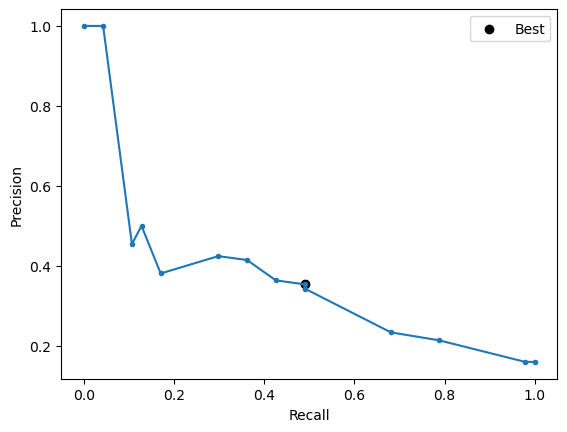

In [231]:
precision, recall, thresholds = precision_recall_curve(y_val, predict_proba[:,1])

# compute F1 score, avoid division by zero
fscore = np.where((precision + recall) > 0, (2 * precision * recall) / (precision + recall), 0) #quando recall for maior que zero, calculo o F1

# locate the index of the largest f score
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))

plt.plot(recall, precision, marker='.')
plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()